ما داده هایی داریم به برای بیماران قلبی و عروقی هستند 
و یا بر اساس ویژگی هایی که دارند طبقه بندی نشدند 
ما قرار است با توجه به این ویژگی ها پیش بینی کنیم که آیا بیمار مبتلا به این بیماری است یا خیر 
از الگوریتم لوجستیک رگریشن استفاده میشود 


در ابتدا کتابخانه های مورد نظر را وارد میکنیم 
کتابخانه هایی نظیر نامپای برای محاسبات عددی و پاندا برای محاسبات ریاضی و پیلوت برای رسم شکل 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

دیتا مورد نظر را با استفاده از فرمت csv وارد میکنیم 

In [2]:
df=pd.read_csv('C:\heart.csv')

برای نشان دادن فایل و پنج ستون به صورت (top n) از دستور زیر استفاده میکنیم  

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


تمام جدول را به صورت زیر چاپ میکنیم 

In [4]:
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139      0      0.2   
12    49    

برای نشان دادن جدول روی نمودار به صورت زیر عمل میکنیم 

<function matplotlib.pyplot.show(*args, **kw)>

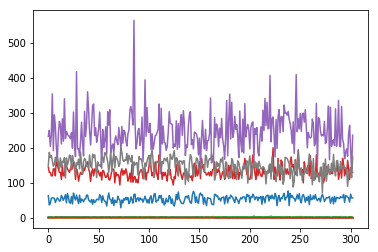

In [5]:
plt.plot(df)
plt.show

برای نشان دادن سابقه بیماری از تارگت مشخص میشود 
که برای رسم تارگت از دستور زیر استفاده میکنیم 
چون ستون تارگت برای مااهمیت دارد 

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

برای رسم نمودار از توابع مختلف استفاده میکنیم 
یکی از این توابع اس ان اس میباشد که به صورت خودکار نمودار عمودی برابر مقدار شمارنده ها قرار دارد  

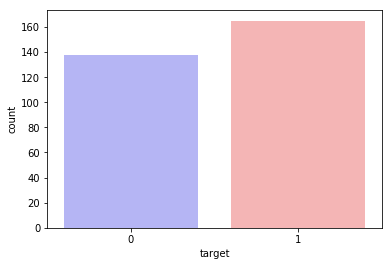

In [7]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [8]:
print(df.target)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
273    0
274    0
275    0
276    0
277    0
278    0
279    0
280    0
281    0
282    0
283    0
284    0
285    0
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


برای نشان دادن سن با داشتن بیماری به صورت نمودار زیر نمایش داده میشود 

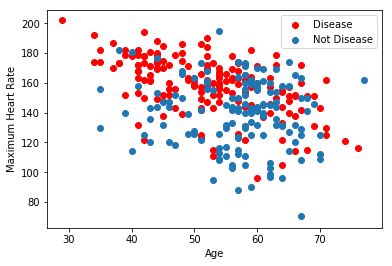

In [9]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [12]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

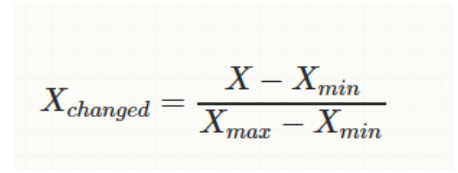

اول داده ها را نرمال میکنیم 

In [13]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [14]:
print(x)

          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053   
1    0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496   
2    0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992   
3    0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794   
4    0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290   
5    0.583333  1.0  0.000000  0.433962  0.150685  0.0      0.5  0.587786   
6    0.562500  0.0  0.333333  0.433962  0.383562  0.0      0.0  0.625954   
7    0.312500  1.0  0.333333  0.245283  0.312785  0.0      0.5  0.778626   
8    0.479167  1.0  0.666667  0.735849  0.166667  1.0      0.5  0.694656   
9    0.583333  1.0  0.666667  0.528302  0.095890  0.0      0.5  0.786260   
10   0.520833  1.0  0.000000  0.433962  0.257991  0.0      0.5  0.679389   
11   0.395833  0.0  0.666667  0.339623  0.340183  0.0      0.5  0.519084   
12   0.41666

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [15]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [16]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

برای انجام دادن پردیکشن ما نیاز به یک وزن داریم پس :
Let's say weight = 0.01 and bias = 0.0

In [17]:
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [18]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [19]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []

    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [20]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [21]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [22]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    

    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)/100*100))

iteration: 100
cost: 0.37966533849933537


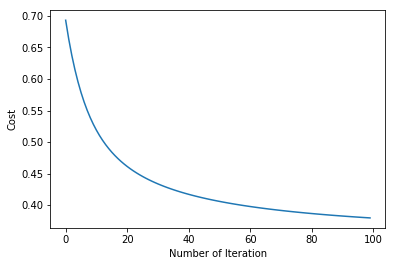

Manuel Test Accuracy: 81.97%


In [23]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

knn value

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 83.61%


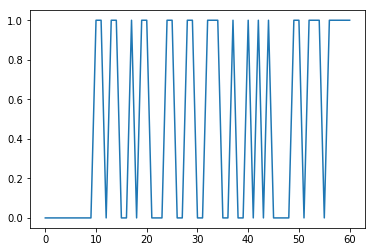

In [25]:
plt.plot(prediction)
plt.show()